<a href="https://colab.research.google.com/github/TonyNguyen001/BaiTapAI/blob/main/Robot_3dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import csv
import math as m
l1 = 50
l2 = 40
l3 = 20
with open('Robot_3dof.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','tt3','Px','Py','T'])

  for tt1 in range(-150,180,1):
    for tt2 in range(-130,170,1):
      for tt3 in range(-110,160,1):
        Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2) + l3*m.cos(tt1+tt2+tt3)
        Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2) + l3*m.sin(tt1+tt2+tt3)
        T = tt1+tt2+tt3
        writer.writerow([tt1,tt2,tt3,Px,Py,T])
data=pd.read_csv('Robot_3dof.csv')
data
x=data.drop(data.columns[:3],axis=1)
y=data.drop(data.columns[3:],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               2048      
                                                                 
 dense_6 (Dense)             (None, 500)               256500    
                                                                 
 dense_7 (Dense)             (None, 300)               150300    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 3)                 303       
                                                                 
Total params: 439,251
Trainable params: 439,251
Non-trainable params: 0
_________________________________________________________________
156622/156622 [==============================] -

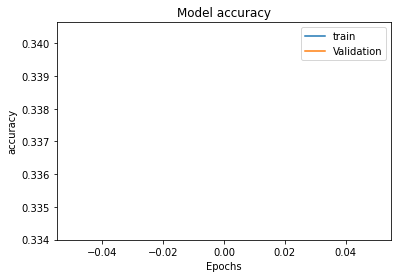

In [6]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=1,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test,verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac kiem tra la:', score[1])

model.save('Model_Robot_3dof.h5')
from tensorflow.keras.models import load_model
model = load_model('Model_Robot_3dof.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','Validation'])
plt.show()

# New Section